## 🖼️ **CIFAR-10 Image Classification**



## 📌 **Introduction**
The CIFAR-10 dataset consists of **60,000 tiny color images (32x32 pixels)** across **10 object categories**, including airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.  
Image classification is a **core task in computer vision**, helping machines understand and recognize visual information.

This project focuses on:
- Building a **Custom Convolutional Neural Network (CNN)** with Dropout, Batch Normalization, and Data Augmentation.
- Leveraging a **Pretrained ResNet50 model** for improved performance.
- Comparing both models using **accuracy, precision, recall, F1-score, and confusion matrices**.
- Visualizing **training curves and sample predictions**.

---

## 🎯 **Objectives**
- Perform **data loading and preprocessing** on CIFAR-10 images.  
- Train a **Custom CNN** and evaluate its performance.  
- Apply **Transfer Learning** using ResNet50.  
- Compare **performance metrics** of both models.  
- Visualize **training results and predictions** for better understanding.


-------------

### **Importing required libraries**

_run this command if you do NOT have these libraries installed_
```bash
pip install -r requirements.txt
```

In [42]:
import tensorflow.keras as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

In [3]:
print("Train Images: ", X_train.shape)
print("Train Images: ", X_test.shape)

Train Images:  (50000, 32, 32, 3)
Train Images:  (10000, 32, 32, 3)


In [4]:
X_train = X_train.astype('float') /255.0
X_test = X_test.astype('float') /255.0

In [5]:
classes = 10
y_train = to_categorical(y_train,classes)
y_test = to_categorical(y_test,classes)

In [6]:
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,zoom_range=0.1)
datagen.fit(X_train)

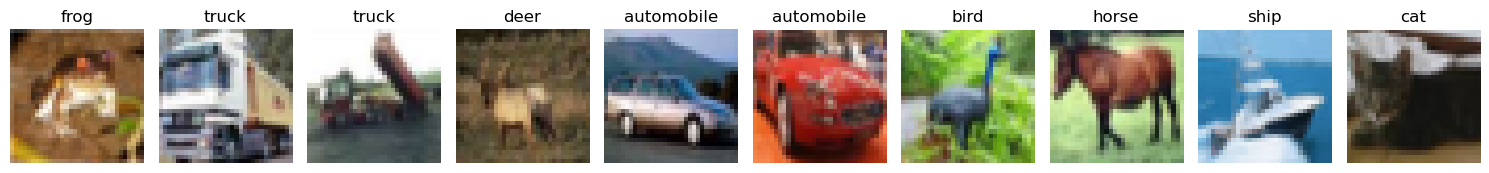

In [7]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(15,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.tight_layout()    
plt.show()

In [107]:
model= models.Sequential([

    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3), activation='relu'),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    
    layers.Conv2D(64,(1,1), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
]
)

In [108]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_31 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 5, 5, 64)       │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200,522 (783.29 KB)

 Trainable params: 200,522 (783.29 KB)

 Non-trainable params: 0 (0.00 B)

In [109]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)

In [110]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [111]:
history = model.fit(X_train, y_train, epochs=10, 
                    batch_size=64, 
                    validation_split=0.2)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 46ms/step - accuracy: 0.3914 - loss: 1.6617 - val_accuracy: 0.4857 - val_loss: 1.4075
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.5546 - loss: 1.2522 - val_accuracy: 0.6005 - val_loss: 1.1143
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6260 - loss: 1.0609 - val_accuracy: 0.6278 - val_loss: 1.0447
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.6684 - loss: 0.9376 - val_accuracy: 0.6602 - val_loss: 0.9522
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.7032 - loss: 0.8463 - val_accuracy: 0.6996 - val_loss: 0.8668
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.7278 - loss: 0.7769 - val_accuracy: 0.7071 - val_loss: 0.8303
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.7508 - loss: 0.7105 - val_accuracy: 0.7135 - val_loss: 0.8169
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.7673 - loss: 0.6595 - 